In [7]:
from data_loaders import load_AUCS, display_MLG
from sc_ged import SC_GED
from evaluate import evaluate_model, plot_loss
from utils import modularity

import matplotlib.pyplot as plt

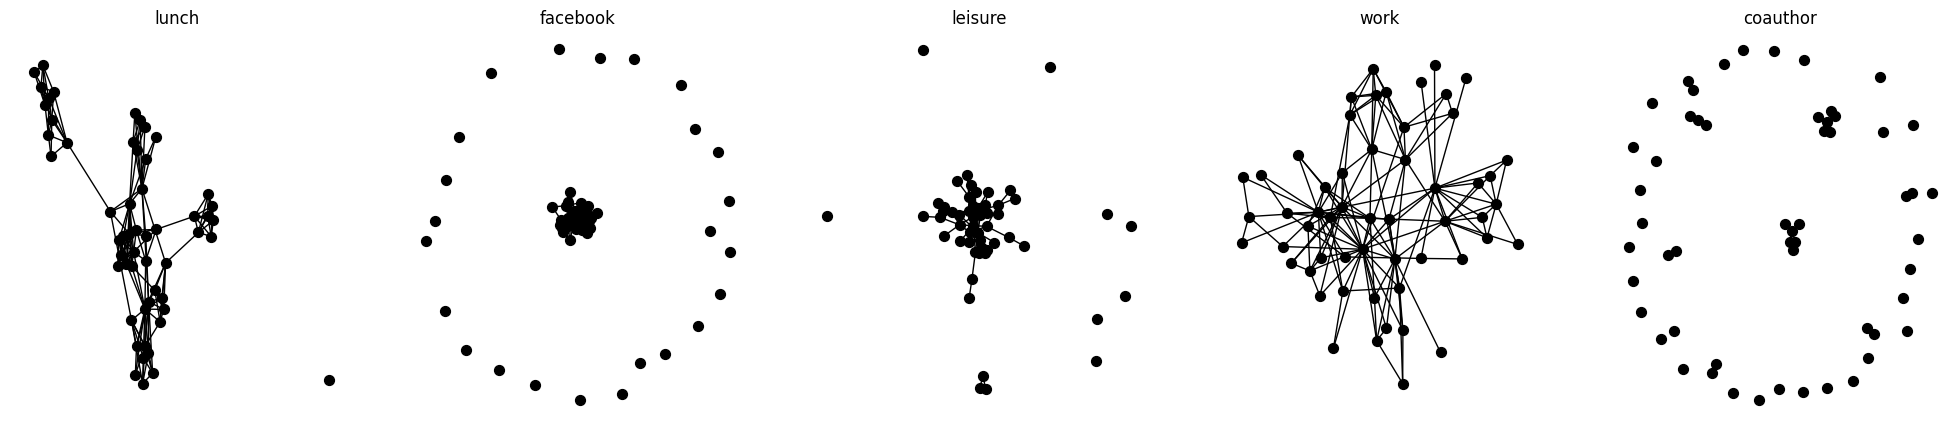

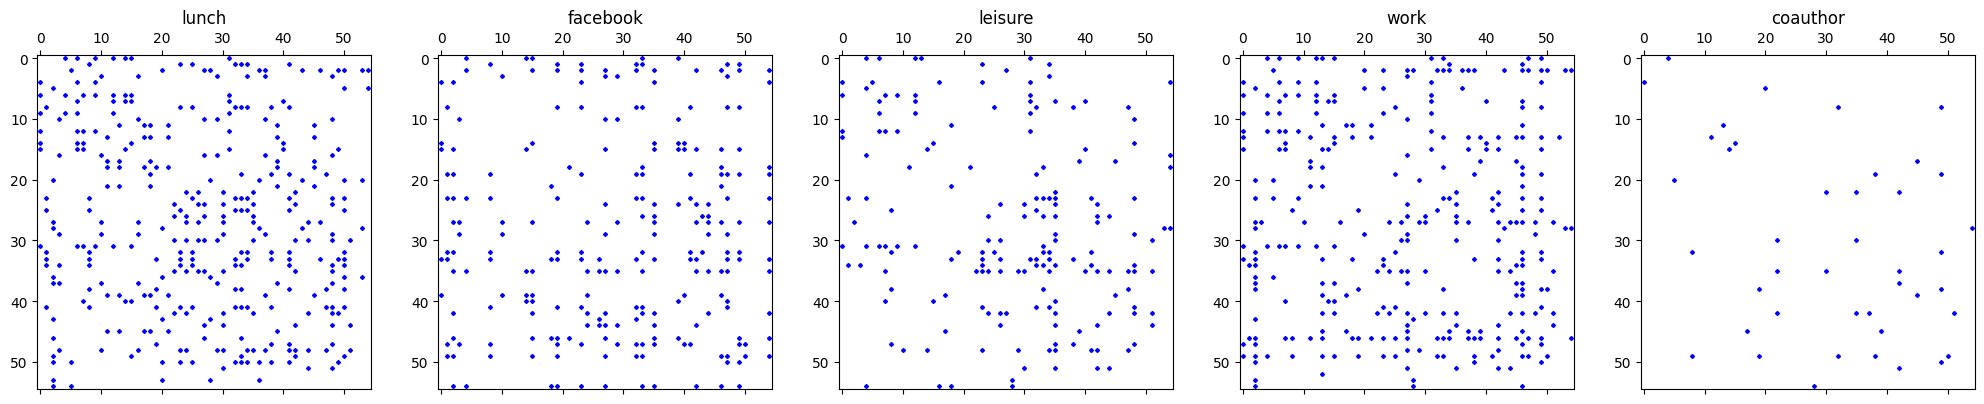

In [2]:
MLG, layer_labels, true_labels = load_AUCS()
display_MLG(MLG, layer_labels)

In [3]:
model = SC_GED(MLG, k=7, most_informative=4, alpha=1, beta=20)
clustering, history, accuracy = evaluate_model(model, true_labels, n_iter=1_000)

start decomposition


Joint Eigen Decomposition: 100%|██████████| 1000/1000 [00:30<00:00, 33.04it/s]


norm of P: 7.67866849899292
norm of Q: 7.591899871826172
norm of P @ Q - I: 0.07349304109811783
Best accuracy: 0.8545454545454545


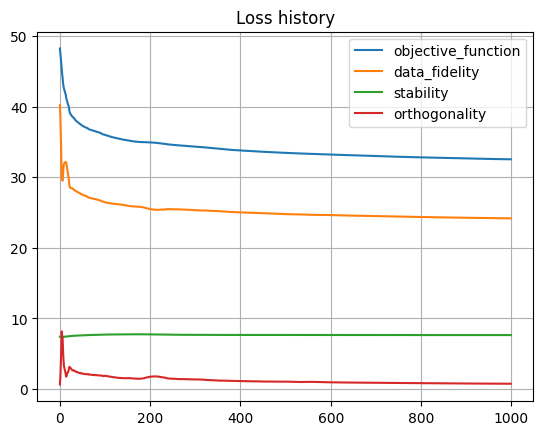

In [4]:
plot_loss(history)

In [5]:
for layer, G in zip(layer_labels, MLG):
    m = modularity(G, clustering)
    print(f"Modularity of layer based on clustering {layer}: {m:.4f}")

Modularity of layer based on clustering lunch: 0.5363
Modularity of layer based on clustering facebook: 0.2286
Modularity of layer based on clustering leisure: 0.4992
Modularity of layer based on clustering work: 0.4251
Modularity of layer based on clustering coauthor: 0.7132


In [13]:
accuracy = []
betas = [1, 5, 10, 15, 30, 50, 100]
for beta in betas:
    print(f"Beta = {beta}")
    model = SC_GED(MLG, k=7, most_informative=4, alpha=1, beta=beta)
    clustering, history, accuracy_value = evaluate_model(model, true_labels, n_iter=500)
    accuracy.append(accuracy_value)

Beta = 1
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:13<00:00, 36.73it/s]


norm of P: 8.64962100982666
norm of Q: 8.640364646911621
norm of P @ Q - I: 2.9551949501037598
Best accuracy: 0.4909090909090909
Beta = 5
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:13<00:00, 37.42it/s]


norm of P: 7.7969889640808105
norm of Q: 7.703090190887451
norm of P @ Q - I: 0.9230721592903137
Best accuracy: 0.7454545454545455
Beta = 10
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:15<00:00, 32.90it/s]


norm of P: 7.664934158325195
norm of Q: 7.631969451904297
norm of P @ Q - I: 0.4539591073989868
Best accuracy: 0.7636363636363637
Beta = 15
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:10<00:00, 45.64it/s]


norm of P: 7.628230571746826
norm of Q: 7.5776286125183105
norm of P @ Q - I: 0.24932284653186798
Best accuracy: 0.8363636363636363
Beta = 30
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:14<00:00, 34.87it/s]


norm of P: 7.162668704986572
norm of Q: 7.989436149597168
norm of P @ Q - I: 8.926499867811799e-05
Best accuracy: 0.38181818181818183
Beta = 50
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:14<00:00, 35.59it/s]


norm of P: 7.41619873046875
norm of Q: 7.416198253631592
norm of P @ Q - I: 4.887685349785897e-07
Best accuracy: 0.45454545454545453
Beta = 100
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:13<00:00, 38.16it/s]


norm of P: 7.41619873046875
norm of Q: 7.416198253631592
norm of P @ Q - I: 2.4205115778386244e-07
Best accuracy: 0.45454545454545453


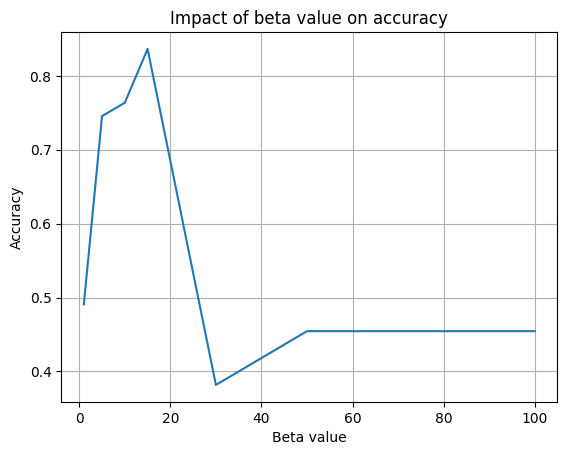

In [14]:
plt.plot(betas, accuracy)
plt.xlabel("Beta value")
plt.ylabel("Accuracy")
plt.title("Impact of beta value on accuracy")
plt.grid()
plt.show()

In [19]:
accuracy = []
alphas = [0, 0.1, 0.5, 1, 3, 5, 7, 10]
for alpha in alphas:
    print(f"Alpha = {alpha}")
    model = SC_GED(MLG, k=7, most_informative=4, alpha=alpha, beta=15)
    clustering, history, accuracy_value = evaluate_model(model, true_labels, n_iter=500)
    accuracy.append(accuracy_value)

Alpha = 0
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:11<00:00, 42.10it/s]


norm of P: 8.464810371398926
norm of Q: 8.929911613464355
norm of P @ Q - I: 0.2594912052154541
Best accuracy: 0.8363636363636363
Alpha = 0.1
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:14<00:00, 34.71it/s]


norm of P: 7.955184459686279
norm of Q: 9.169075012207031
norm of P @ Q - I: 0.25592195987701416
Best accuracy: 0.8363636363636363
Alpha = 0.5
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:13<00:00, 38.27it/s]


norm of P: 7.309813499450684
norm of Q: 8.361919403076172
norm of P @ Q - I: 0.2568458318710327
Best accuracy: 0.8363636363636363
Alpha = 1
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:12<00:00, 39.52it/s]


norm of P: 7.628230571746826
norm of Q: 7.5776286125183105
norm of P @ Q - I: 0.24932284653186798
Best accuracy: 0.8363636363636363
Alpha = 3
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:16<00:00, 29.97it/s]


norm of P: 7.419408798217773
norm of Q: 7.434970378875732
norm of P @ Q - I: 0.2637261748313904
Best accuracy: 0.8545454545454545
Alpha = 5
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:13<00:00, 37.61it/s]


norm of P: 7.390482425689697
norm of Q: 7.374650001525879
norm of P @ Q - I: 0.30098122358322144
Best accuracy: 0.7636363636363637
Alpha = 7
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:14<00:00, 34.21it/s]


norm of P: 7.348409652709961
norm of Q: 7.342541694641113
norm of P @ Q - I: 0.34325721859931946
Best accuracy: 0.7454545454545455
Alpha = 10
start decomposition


Joint Eigen Decomposition: 100%|██████████| 500/500 [00:12<00:00, 40.51it/s]


norm of P: 7.293787956237793
norm of Q: 7.276681900024414
norm of P @ Q - I: 0.43611636757850647
Best accuracy: 0.7636363636363637


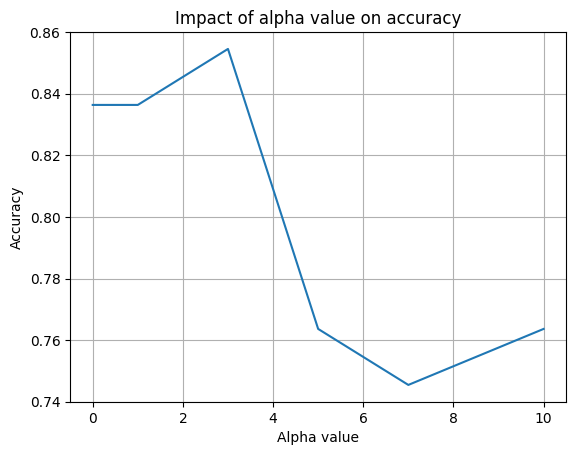

In [20]:
plt.plot(alphas, accuracy)
plt.xlabel("Alpha value")
plt.ylabel("Accuracy")
plt.title("Impact of alpha value on accuracy")
plt.grid()
plt.show()

Results:
* requires manually choosing beta and alpha for each specific case which is not always ideal when we don't have the real labels: very sensitive to alpha and beta values
* Requires a lot of comupations to find the eigenvalues of all layers and eigenvectors of the most informative layer: not suited for high dimentional datasets
* Modularity is high for coauthor layer as we put it as the most informative but also because members of the same group would more likely co-author together. Then there's the lunch and leisure which makes sense because if you work together you will more likely have outside activities together or eat together at lunch. The work was expected to be higher but maybe lunch groups can include different people from the group but not necessarily directly work together during working hours. Finally, the facebook has the lowest modularity as people from different working groups can be friends on social media with anyone from work. 
* A low alpha has no impact in this case on the stability of of P and Q. Maybe it's already inforced implicitly in the data fidelity term. Higher alpha values degrade the results.  

Ideas to implement:
* See how the data_fidelity, sparsity, orthogonality terms evolve over iterations (Normalize maybe and see the difference in scale to find the best beta and alpha)

* Evaluate the impact of different alpha and beta values to conclude the sensitivity of the model to hyperparams

* Implement more evaluation metrics like the ones in the paper

* Test this on a big graph dataset to conclude that it's not suitable for big datasets

* Show how the first eigen vectors can be mapped to 1D dimension 

* Maybe find more datasets with labels this time

